# Chapter 1: Thinking Probabilistically

In [35]:
import matplotlib.pyplot as plt
import preliz as pz
import numpy as np
import pandas as pd

## Exercise 2

Previously, we defined a Python function P to compute the probability of an event 
using the naive definition of probability. Generalize that function to compute the
probability of events when they are not all equally likely. Use this new function to
compute the probability of events 𝐴 and 𝐵 from the previous exercise. Hint: you can
pass a third argument with the probability of each event.

In [2]:
# Previous function
def P(S, A):
    if set(A).issubset(set(S)):
        return len(A) / len(S)
    else:
        return 0

In [3]:
# Exercise solution
def P(sample_space_probas: dict[str, float], events: set):
    if events.issubset(sample_space_probas.keys()):
        return sum([sample_space_probas[event] for event in events])
    else:
        return 0

sample_space_probas = {"s": 0.5, "b": 0.25, "c": 0.25}

In [4]:
events = {"s"}
P(sample_space_probas, events)

0.5

In [5]:
events = {"s", "b"}
P(sample_space_probas, events)

0.75

## Exercise 7

In [9]:
mean = 0
variance = 2
skewness = 3
skew_normal = pz.SkewNormal(
    mu=mean, 
    sigma=variance, 
    alpha=skewness,
)

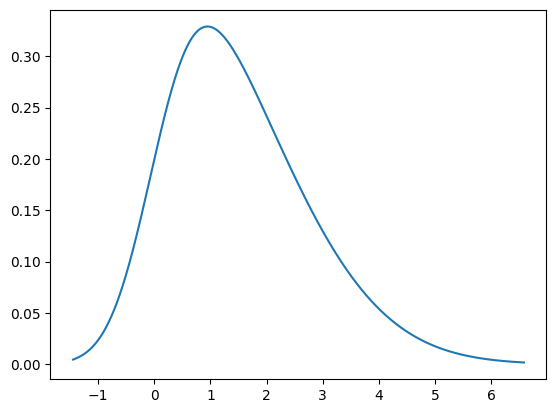

In [40]:
# Visualize the original distribution
x = np.linspace(skew_normal.ppf(0.001), skew_normal.ppf(0.999), 1000)
plt.plot(x, skew_normal.pdf(x))

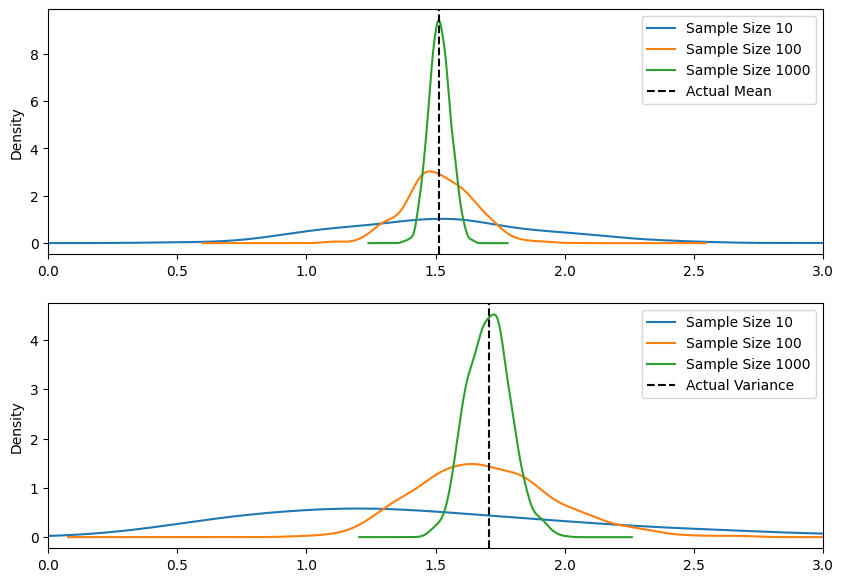

In [56]:
# Sample sizes to test
sample_sizes = [10, 100, 1000]
num_samples = 1000

actual_mean, actual_variance = skew_normal.rv_frozen.stats("mv")

_, ax = plt.subplots(2, 1, figsize=(10, 7))

sample_variances = []
for sample_size in sample_sizes:
    samples = skew_normal.rvs((num_samples, sample_size))

    pd.Series(samples.mean(axis=1)).plot.kde(label=f"Sample Size {sample_size}", ax=ax[0])
    pd.Series(samples.var(axis=1)).plot.kde(label=f"Sample Size {sample_size}", ax=ax[1])

ax[0].axvline(actual_mean, color='black', linestyle='dashed', label=f"Actual Mean")
ax[1].axvline(actual_variance, color='black', linestyle='dashed', label=f"Actual Variance")
ax[0].set_xlim(0, 3)
ax[1].set_xlim(0, 3) 
ax[0].legend()
ax[1].legend()

**Key Observations**
1. Larger sample sizes lead to more accurate estimates with less uncertainty.
2. The Law of Large Numbers (LLN) ensures convergence to the true mean, while the Central Limit Theorem (CLT) makes the sample mean distribution approximately normal, even if the original distribution is skewed.  

In [ ]:
# REMEMBER, FILL THE README!!!